In [ ]:
import torch
import pandas as pd

In [ ]:
data = pd.read_csv('combined_data.csv')
data.head()

,sentence,label,contains_latin,contains_emoji
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,positive,False,False
1,منتوج رائع وثمن مناسب ....جميل,positive,False,False
2,كلنا ابن كيران لمتافق معايا يدير جيم,positive,False,False
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,positive,False,False
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,positive,False,False


In [ ]:
import re
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df' and the text column is 'text'
def contains_latin(text):
    # Regex pattern for Latin letters (A-Z, a-z)
    return bool(re.search(r'[a-zA-Z]', text))

def contains_emoji(text):
    # Regex pattern for emojis (ranges may vary, this is a general one)
    return bool(re.search(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]', text))

# Count rows with Latin characters
latin_rows = data[data['sentence'].apply(contains_latin)]
print(f"Number of rows with Latin characters: {len(latin_rows)}")

# Count rows with emojis
emoji_rows = data[data['sentence'].apply(contains_emoji)]
print(f"Number of rows with emojis: {len(emoji_rows)}")


Number of rows with Latin characters: 6106
Number of rows with emojis: 17274


In [ ]:
unique = data['contains_latin'].unique()
print(unique)

[False nan]


In [ ]:
# Supprimer les colonnes 'contains_latin' et 'contains_emoji'
data = data.drop(columns=['contains_latin', 'contains_emoji'])

In [ ]:
data.head()

,sentence,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,positive
1,منتوج رائع وثمن مناسب ....جميل,positive
2,كلنا ابن كيران لمتافق معايا يدير جيم,positive
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,positive
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,positive


In [ ]:
unique = data['label'].unique()
print(unique)

['positive' 'negative' 'neutral' '1' '-1']


In [ ]:
data.replace(to_replace=['positive', 'negative', 'neutral'], value=[2, 1, 0], inplace=True)
data.replace(to_replace=['1', '-1'], value=[2, 1], inplace=True)
data.tail()

<ipython-input-8-420cd91d8782>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace=['1', '-1'], value=[2, 1], inplace=True)


,sentence,label
40981,"""من هادشي كاااامل 😒 اناا ما فهمت والو !!؟؟ 😒",1
40982,"""لا حول و قوة إلا بالله العلي العضيم😔🤕",1
40983,"""صحافي باش كتحسي من لداخل . كتحس بلخرا اسيدي 😒😒",1
40984,"""الله يعطيكم الغراق كاملين 😠😠",1
40985,"""اش هاد لحالا سعيده شرف😒ماشي زادت فيه 😑 ركزي ع...",1


In [ ]:
data.shape

(40986, 2)

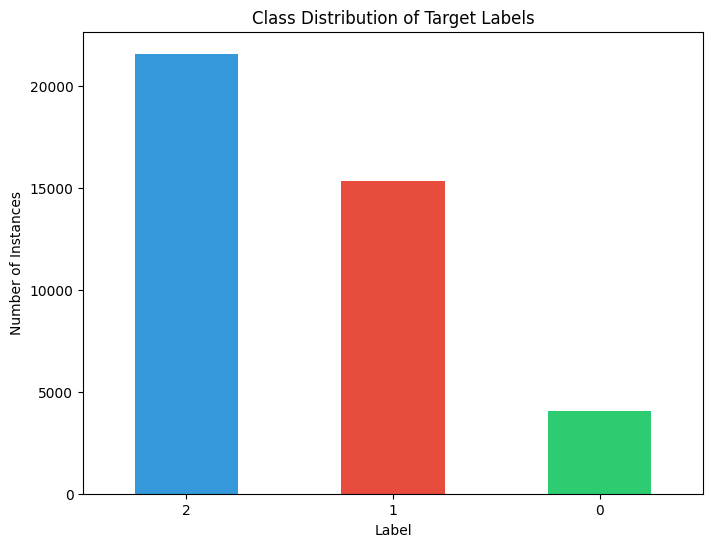

,count
label,
2,21588
1,15361
0,4037


In [ ]:
import matplotlib.pyplot as plt

# Check the distribution of the target class labels
class_distribution = data['label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Class Distribution of Target Labels')
plt.xlabel('Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

# Display the class distribution counts
class_distribution


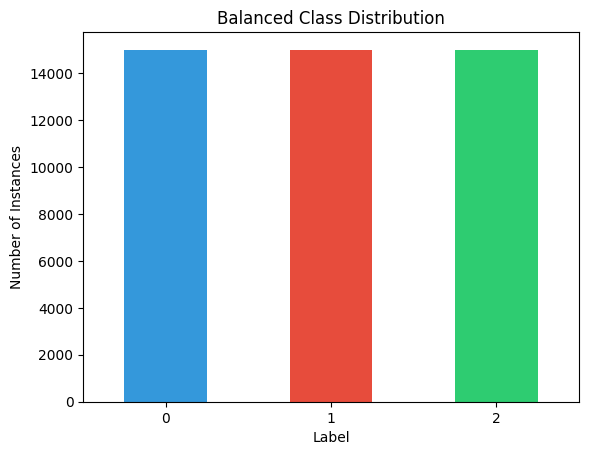

,count
label,
0,15000
1,15000
2,15000


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'data' is your DataFrame and 'label' is the target column

# Separate each class
negative = data[data['label'] == 1]
positive = data[data['label'] == 2]
neutral = data[data['label'] == 0]

# Undersample Negative class to 20,000 instances
negative_undersampled = resample(negative,
                                 replace=False,     # No replacement
                                 n_samples=15000,   # Set to 20,000
                                 random_state=42)

# Oversample Positive class to 20,000 instances
positive_oversampled = resample(positive,
                                replace=False,      # With replacement
                                n_samples=15000,   # Set to 20,000
                                random_state=42)

# Oversample Neutral class to 20,000 instances
neutral_oversampled = resample(neutral,
                               replace=True,      # With replacement
                               n_samples=15000,   # Set to 20,000
                               random_state=42)

# Combine the resampled classes into a balanced dataset
balanced_data = pd.concat([negative_undersampled, positive_oversampled, neutral_oversampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
balanced_class_distribution = balanced_data['label'].value_counts()

# Plot the class distribution
balanced_class_distribution.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Balanced Class Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

# Display the new class distribution counts
balanced_class_distribution


In [ ]:
from sklearn.model_selection import train_test_split
X = balanced_data['sentence'].values
y = balanced_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.1 MB/s eta 0:00:00


In [ ]:
import emoji

def preprocess_with_emoji(text):
    """
    This function replaces emojis in the text with their descriptive names.
    Example: 😊 -> ':smile:'
    """
    return emoji.demojize(text)

# Apply this function to your dataset
X_train = [preprocess_with_emoji(sentence) for sentence in X_train]
X_test = [preprocess_with_emoji(sentence) for sentence in X_test]


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
def preprocessing_for_bert(data):

    input_ids = []  # store the tokenized IDs of each sentence
    attention_masks = []  # store attention mask values

    # For every sentence...
    for sent in data:
        # Tokenize the sentence
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',  # Ensures padding to max length
            truncation=True,  # Truncates if sentence exceeds max length
            return_attention_mask=True
        )

        # Check if the sentence has more than one token (after tokenization)
        if len(encoded_sent['input_ids']) > 1:  # Filtering after tokenization
            input_ids.append(encoded_sent.get('input_ids'))
            attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks


In [ ]:
# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X]
# Find the maximum, minimum, and average length of the sentences
max_len = max(len(sent) for sent in encoded_tweets)
min_len = min(len(sent) for sent in encoded_tweets)
avg_len = sum(len(sent) for sent in encoded_tweets) / len(encoded_tweets)

Token indices sequence length is longer than the specified maximum sequence length for this model (670 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Count the number of sentences that are longer than a threshold (e.g., 512 tokens)
long_sentences_count = sum(len(sent) > 512 for sent in encoded_tweets)
short_sentences_count = sum(len(sent) < 512 for sent in encoded_tweets)

# Print results
print(f'Max length: {max_len}')
print(f'Min length: {min_len}')
print(f'Average length: {avg_len:.2f}')
print(f'Number of sentences longer than 512 tokens: {long_sentences_count}')
print(f'Number of sentences shorter than 512 tokens: {short_sentences_count}')

Max length: 1160
Min length: 2
Average length: 25.62
Number of sentences longer than 512 tokens: 9
Number of sentences shorter than 512 tokens: 44991


In [ ]:
# Count the number of sentences that are longer than a threshold (e.g., 256 tokens)
long_sentences_count = sum(len(sent) > 256 for sent in encoded_tweets)
short_sentences_count = sum(len(sent) < 256 for sent in encoded_tweets)

# Print results
print(f'Max length: {max_len}')
print(f'Min length: {min_len}')
print(f'Average length: {avg_len:.2f}')
print(f'Number of sentences longer than 512 tokens: {long_sentences_count}')
print(f'Number of sentences shorter than 512 tokens: {short_sentences_count}')

Max length: 1160
Min length: 2
Average length: 25.62
Number of sentences longer than 512 tokens: 67
Number of sentences shorter than 512 tokens: 44931


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 256

# Print sentence 2 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[2]])[0].squeeze().numpy())
print('Original: ', X[2])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_test)

Original:   تصويرة عفوية
Token IDs:  [101, 766, 70642, 10382, 781, 11687, 18282, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

'''
TensorDataset to combine inputs, attention masks, and labels.
RandomSampler for training data (random shuffling) and SequentialSampler for validation (no shuffling).
The DataLoader objects handle batching and loading for model training and evaluation.
'''

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_test)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 16

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
import torch.nn as nn
from transformers import BertModel
import numpy as np

In [ ]:
'''
The BertClassifier class defines a BERT-based model with a simple classifier on top.

1.BERT Model: Uses BertModel from Hugging Face to handle text input, generating embeddings for each token.

2.Feedforward Classifier: After extracting the [CLS] token's hidden state from BERT's output, it's passed through
 a fully connected network (nn.Linear layers) to produce logits for classification (3 output classes in this case).

3.Freezing BERT: The option to freeze BERT's weights is provided, which prevents its parameters from being updated
  during training, for Faster Training, and avoiding overfitting

'''


# Create the BertClassfier class
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 3

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on CPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """
    This part of the code is setting up reproducibility by
    defining a fixed random seed across libraries and platforms.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

In [ ]:
def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """
    The train function starts by defining parameters and taking in the model, dataloaders, and hyperparameters.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()


            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

       # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during the test time.
    model.eval()
    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(bert_classifier, train_dataloader, val_dataloader, epochs=3, evaluation=True)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   1.091012   |     -      |     -     |   14.78  
   1    |   40    |   0.971959   |     -      |     -     |   12.63  
   1    |   60    |   0.930820   |     -      |     -     |   12.80  
   1    |   80    |   0.884030   |     -      |     -     |   12.98  
   1    |   100   |   0.749309   |     -      |     -     |   13.25  
   1    |   120   |   0.826778   |     -      |     -     |   13.42  
   1    |   140   |   0.723259   |     -      |     -     |   13.71  
   1    |   160   |   0.731318   |     -      |     -     |   13.96  
   1    |   180   |   0.769901   |     -      |     -     |   13.94  
   1    |   200   |   0.724423   |     -      |     -     |   13.74  
   1    |   220   |   0.659583   |     -      |     -     |   13.64  
   1    |   240   |   0.708150   |     -      |     -     |   13.63  


In [ ]:
# 1. Sauvegarder le modèle entraîné
model_save_path = "bert_classifier_model.pt"
torch.save(bert_classifier.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")



Model saved to bert_classifier_model.pt


In [ ]:
torch.save(bert_classifier, 'bert_classifier_complete.pt')


In [ ]:
# 2. Sauvegarder le tokenizer
tokenizer_save_path = "tokenizer"
tokenizer.save_pretrained(tokenizer_save_path)
print(f"Tokenizer saved to {tokenizer_save_path}")



Tokenizer saved to tokenizer


In [ ]:
# 3. (Optionnel) Sauvegarder des métadonnées utiles
metadata = {
    "MAX_LEN": MAX_LEN,
    "batch_size": batch_size
}

import json
metadata_save_path = "metadata.json"
with open(metadata_save_path, "w") as f:
    json.dump(metadata, f)
print(f"Metadata saved to {metadata_save_path}")


Metadata saved to metadata.json


In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def evaluate_multiclass_roc(probs, y_true, num_classes=3):
    # Binarize labels for multi-class ROC
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.2f}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

Accuracy: 91.20%


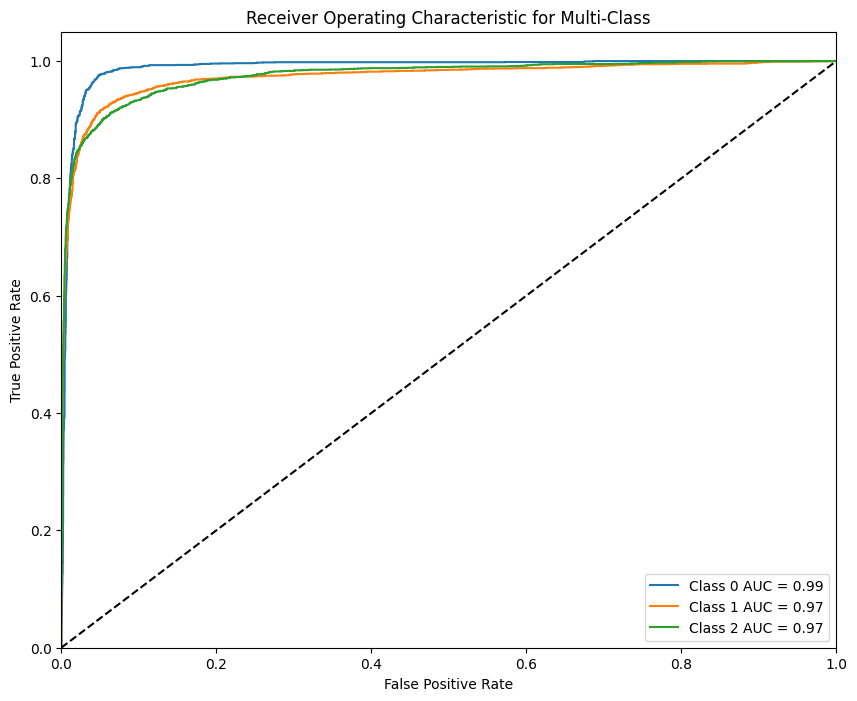

In [ ]:
import matplotlib.pyplot as plt

'''# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)


# Evaluate the classifier
evaluate_multiclass_roc(probs, y_test, num_classes=3)'''

from sklearn.metrics import accuracy_score

# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Get predictions by selecting the class with highest probability
preds = np.argmax(probs, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy*100:.2f}%")

# Evaluate the classifier
evaluate_multiclass_roc(probs, y_test, num_classes=3)
